# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Name & GitHub ID

- Name: Tai Le
- GitHub Username: tnl001

# Research Question

What is the relationship between the amount of violent and violent related crimes and the parks' hour of operation in San Diego?

## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


Violent and violent related crimes tend to fall within the operating hour of San Diego parks.

# Dataset(s)

Dataset Name: San Diego Crime Data 2018
- Link to the dataset: http://seshat.datasd.org/pd/pd_calls_for_service_2018_datasd.csv
- Number of observations: 570459
- Description: This dataset contains the crime calls that were made and the type of crime that were reported in 2018

Dataset Name: San Diego Crime Data 2019
- Link to the dataset: http://seshat.datasd.org/pd/pd_calls_for_service_2019_datasd.csv
- Number of observations: 590967
- Description: This dataset contains the crime calls that were made and the type of crime that were reported in 2019

Dataset Name: San Diego Crime Data 2020
- Link to the dataset: http://seshat.datasd.org/pd/pd_calls_for_service_2020_datasd.csv
- Number of observations: 522569
- Description: This dataset contains the crime calls that were made and the type of crime that were reported in 2020

Dataset Name: San Diego Crime Crime Call Types
- Link to the dataset: http://seshat.datasd.org/pd/pd_cfs_calltypes_datasd.csv
- Number of observations: 289
- Description: This dataset contains codes of call type and their associated description

Dataset Name: San Diego Police Department Beat Codes
- Link to the dataset: http://seshat.datasd.org/pd/pd_beat_neighborhoods_datasd.csv
- Number of observations: 125
- Description: This dataset contains beat codes that are associated with San Diego neighborhoods

Dataset Name: San Diego Parks
- Link to the dataset: https://github.com/COGS108/individual_fa20/blob/master/data/yelp_SD_parks.csv
- Number of observations: 833
- Description: This dataset includes San Diego parks' names and zipcodes

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

# Data Cleaning

Load in the datasets

In [2]:
crime_2020 = pd.read_csv('pd_calls_for_service_2020_datasd.csv')
crime_2019 = pd.read_csv('pd_calls_for_service_2019_datasd.csv')
crime_2018 = pd.read_csv('pd_calls_for_service_2018_datasd.csv')
call_types = pd.read_csv('pd_cfs_calltypes_datasd.csv')
pd_beat_codes = pd.read_csv('pd_beat_neighborhoods_datasd.csv')
parks_info = pd.read_csv('yelp_SD_parks.csv')

In [3]:
parks_info.shape

(833, 10)

Here, I'm taking a quick look at what the data looks like

In [4]:
crime_2020.head()

,incident_num,date_time,day_of_week,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary,address_dir_intersecting,address_road_intersecting,address_sfx_intersecting,call_type,disposition,beat,priority
0,E20010000001,2020-01-01 00:00:09,4,400,NaN,06TH,AVE,NaN,NaN,NaN,11-8,A,523,0
1,E20010000002,2020-01-01 00:00:20,4,5000,NaN,UNIVERSITY,AVE,NaN,NaN,NaN,FD,K,826,2
2,E20010000003,2020-01-01 00:00:21,4,800,NaN,SAWTELLE,AVE,NaN,NaN,NaN,AU1,W,434,1
3,E20010000004,2020-01-01 00:00:32,4,5000,NaN,UNIVERSITY,AVE,NaN,NaN,NaN,FD,K,826,2
4,E20010000005,2020-01-01 00:00:42,4,5200,NaN,CLAIREMONT MESA,BLV,NaN,NaN,NaN,415V,K,111,1


In [5]:
crime_2019.head()

,incident_num,date_time,day_of_week,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary,address_dir_intersecting,address_road_intersecting,address_sfx_intersecting,call_type,disposition,beat,priority
0,E19010000001,2019-01-01 00:00:01,1,3800,NaN,NATIONAL,AVE,NaN,NaN,NaN,AU1,DUP,441,1
1,E19010000002,2019-01-01 00:00:04,1,6500,NaN,REFLECTION,DR,NaN,NaN,NaN,415,K,321,2
2,E19010000003,2019-01-01 00:00:09,1,0,NaN,06TH,AVE,NaN,ISLAND,NaN,FD,K,523,2
3,E19010000004,2019-01-01 00:00:19,1,0,NaN,VESTA,ST,NaN,MAIN,NaN,AU1,W,511,1
4,E19010000005,2019-01-01 00:00:31,1,0,NaN,04TH,AVE,NaN,ISLAND,NaN,586,CAN,523,4


Taking a look at the call_types dataset

In [6]:
call_types

,call_type,description,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,1016,PRISONER IN CUSTODY,NaN,NaN,NaN
1,1016PT,PTU (PRISONER TRANSPORT),NaN,NaN,NaN
2,1016QC,SHOPLIFTER/QUICK CITE,NaN,NaN,NaN
3,1021,PHONE YOUR STATION,NaN,NaN,NaN
4,1021H,PHONE YOUR HOME,NaN,NaN,NaN
...,...,...,...,...,...
284,TLO,TERRORISM LIAISON OFFICER,NaN,NaN,NaN
285,TP,TRAFFIC PURSUIT,NaN,NaN,NaN
286,TRO,"TRO VIOLATION, REPORT",NaN,NaN,NaN
287,VARDA,VARDA ALARM,NaN,NaN,NaN


Dropping the 3 Unnamed columns

In [7]:
call_types = call_types.dropna(axis=1)

In [8]:
call_types = call_types.drop_duplicates('call_type')

I noticed that there are some inconsistency with the 11-6, 11-7, and 11-8 call type codes when opening them in Excel and reading them as csv using pandas. I replace the inconsistent values with the correct values.

In [9]:
for n in call_types['call_type'].values: 
    call_types['call_type'].replace(to_replace='6-Nov', value='11-6', inplace=True)
    call_types['call_type'].replace(to_replace='7-Nov', value='11-7', inplace=True)
    call_types['call_type'].replace(to_replace='8-Nov', value='11-8', inplace=True)

Merging the cl_crimes with call_types using the left outer joint method. This way, I will have the description from call_types for each call type in cl_crimes.

In [10]:
cl_crimes = pd.concat([crime_2018, crime_2019, crime_2020]).reset_index(drop=True)

In [11]:
cl_crimes.duplicated('beat').sum()

1683750

In [12]:
cl_crimes = cl_crimes.merge(call_types, how='left')
cl_crimes

#call_types

,incident_num,date_time,day_of_week,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary,address_dir_intersecting,address_road_intersecting,address_sfx_intersecting,call_type,disposition,beat,priority,description
0,E18010000001,2018-01-01 00:00:09,0,0,NaN,MONROE,AVE,NaN,PARK,NaN,FD,K,624,2,FLAG DOWN/FIELD INITIATED
1,E18010000002,2018-01-01 00:00:41,0,0,NaN,MAIN,ST,NaN,THOR,NaN,AU1,W,511,1,ALL UNITS INFORMATION-PRI 1
2,E18010000003,2018-01-01 00:00:52,0,4300,NaN,OCEAN,BLV,NaN,NaN,NaN,1016,A,122,2,PRISONER IN CUSTODY
3,E18010000004,2018-01-01 00:00:55,0,4500,NaN,BOYLSTON,ST,NaN,NaN,NaN,AU1,W,445,1,ALL UNITS INFORMATION-PRI 1
4,E18010000005,2018-01-01 00:00:56,0,0,NaN,04TH,AVE,NaN,ISLAND,NaN,1151,O,523,3,PED STOP/FIELD INTERVIEW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683990,E20120001602,2020-12-01 23:23:01,3,1200,NaN,K,ST,NaN,NaN,NaN,MPSSTP,K,521,2,TRAFFIC STOP FROM THE MOBILE COMPUTER
1683991,E20120001605,2020-12-01 23:28:18,3,5800,NaN,STREAMVIEW,DR,NaN,NaN,NaN,417,K,823,0,THREATENING W/WEAPON
1683992,E20120001608,2020-12-01 23:33:18,3,100,E,CALLE PRIMERA,NaN,NaN,NaN,NaN,T,K,712,2,TRAFFIC STOP WITH PLATE
1683993,E20120001616,2020-12-01 23:48:27,3,100,NaN,06TH,AVE,NaN,NaN,NaN,SELENF,K,521,3,SELECTIVE ENFORCEMENT


Dropping the unnecessary columns

In [13]:
cl_crimes = cl_crimes.drop(labels=['address_dir_intersecting', 'address_road_intersecting', 
                                           'address_sfx_intersecting', 'address_dir_primary', 
                                           'address_number_primary', 'address_road_primary',
                                           'address_sfx_primary'], axis=1)

In [14]:
cl_crimes.head()

,incident_num,date_time,day_of_week,call_type,disposition,beat,priority,description
0,E18010000001,2018-01-01 00:00:09,0,FD,K,624,2,FLAG DOWN/FIELD INITIATED
1,E18010000002,2018-01-01 00:00:41,0,AU1,W,511,1,ALL UNITS INFORMATION-PRI 1
2,E18010000003,2018-01-01 00:00:52,0,1016,A,122,2,PRISONER IN CUSTODY
3,E18010000004,2018-01-01 00:00:55,0,AU1,W,445,1,ALL UNITS INFORMATION-PRI 1
4,E18010000005,2018-01-01 00:00:56,0,1151,O,523,3,PED STOP/FIELD INTERVIEW


In [15]:
# 'DUP' and 'V' stands for duplicate calls 
rows_to_drop = cl_crimes[(cl_crimes['disposition'] == 'DUP') | (cl_crimes['disposition'] == 'V')]
cl_crimes = cl_crimes.drop(rows_to_drop.index)

In [16]:
cl_crimes

,incident_num,date_time,day_of_week,call_type,disposition,beat,priority,description
0,E18010000001,2018-01-01 00:00:09,0,FD,K,624,2,FLAG DOWN/FIELD INITIATED
1,E18010000002,2018-01-01 00:00:41,0,AU1,W,511,1,ALL UNITS INFORMATION-PRI 1
2,E18010000003,2018-01-01 00:00:52,0,1016,A,122,2,PRISONER IN CUSTODY
3,E18010000004,2018-01-01 00:00:55,0,AU1,W,445,1,ALL UNITS INFORMATION-PRI 1
4,E18010000005,2018-01-01 00:00:56,0,1151,O,523,3,PED STOP/FIELD INTERVIEW
...,...,...,...,...,...,...,...,...
1683990,E20120001602,2020-12-01 23:23:01,3,MPSSTP,K,521,2,TRAFFIC STOP FROM THE MOBILE COMPUTER
1683991,E20120001605,2020-12-01 23:28:18,3,417,K,823,0,THREATENING W/WEAPON
1683992,E20120001608,2020-12-01 23:33:18,3,T,K,712,2,TRAFFIC STOP WITH PLATE
1683993,E20120001616,2020-12-01 23:48:27,3,SELENF,K,521,3,SELECTIVE ENFORCEMENT


The beat code will determine which neighborhood it is that the crime occured. Here, I'm taking a quick look at the beat code dataset

In [17]:
pd_beat_codes.head()

,Beat,Neighborhood
0,111,Clairemont Mesa East
1,112,Clairemont Mesa West
2,113,Bay Ho
3,114,North Clairemont
4,115,University City


Renaming the columns so that they are all in lowercase.

In [18]:
pd_beat_codes.columns = ['beat', 'neighborhood']

Merging the cl_crimes with pd_beat_codes using the left outer joint method. This way, I will have the neighborhood's name from pd_beat_codes for each beat code in cl_crimes.

In [19]:
cl_crimes = cl_crimes.merge(pd_beat_codes, how='left')

In [20]:
cl_crimes

,incident_num,date_time,day_of_week,call_type,disposition,beat,priority,description,neighborhood
0,E18010000001,2018-01-01 00:00:09,0,FD,K,624,2,FLAG DOWN/FIELD INITIATED,University Heights
1,E18010000002,2018-01-01 00:00:41,0,AU1,W,511,1,ALL UNITS INFORMATION-PRI 1,Barrio Logan
2,E18010000003,2018-01-01 00:00:52,0,1016,A,122,2,PRISONER IN CUSTODY,Pacific Beach
3,E18010000004,2018-01-01 00:00:55,0,AU1,W,445,1,ALL UNITS INFORMATION-PRI 1,Chollas View
4,E18010000005,2018-01-01 00:00:56,0,1151,O,523,3,PED STOP/FIELD INTERVIEW,Gaslamp
...,...,...,...,...,...,...,...,...,...
1653374,E20120001602,2020-12-01 23:23:01,3,MPSSTP,K,521,2,TRAFFIC STOP FROM THE MOBILE COMPUTER,East Village
1653375,E20120001605,2020-12-01 23:28:18,3,417,K,823,0,THREATENING W/WEAPON,Redwood Village
1653376,E20120001608,2020-12-01 23:33:18,3,T,K,712,2,TRAFFIC STOP WITH PLATE,San Ysidro
1653377,E20120001616,2020-12-01 23:48:27,3,SELENF,K,521,3,SELECTIVE ENFORCEMENT,East Village


Here, I'm just exploring the rows that contain NaN values

In [21]:
cl_crimes[cl_crimes.isna().any(axis=1)]

,incident_num,date_time,day_of_week,call_type,disposition,beat,priority,description,neighborhood
12,E18010000015,2018-01-01 00:02:44,0,1151,O,-1,3,PED STOP/FIELD INTERVIEW,NaN
17,E18010000023,2018-01-01 00:04:01,0,INFOCHP,K,-1,4,INFORMATION FOR CHP,NaN
84,E18010000098,2018-01-01 00:28:43,0,MPSSTP,O,-1,3,TRAFFIC STOP FROM THE MOBILE COMPUTER,NaN
184,E18010000208,2018-01-01 01:22:24,0,MPSSTP,K,-1,3,TRAFFIC STOP FROM THE MOBILE COMPUTER,NaN
293,E18010000325,2018-01-01 02:14:45,0,INFO,K,-1,3,INFORMATION FOR DISPATCHERS,NaN
...,...,...,...,...,...,...,...,...,...
1653058,E20120001176,2020-12-01 16:36:20,3,1186,K,-1,3,SPECIAL DETAIL,NaN
1653132,E20120001263,2020-12-01 17:36:41,3,AU211,W,-1,1,ROBBERY-ALL UNITS INFORMATION,NaN
1653162,E20120001294,2020-12-01 17:59:42,3,INFO,W,-1,2,INFORMATION FOR DISPATCHERS,NaN
1653294,E20120001458,2020-12-01 20:32:31,3,1021,K,-1,3,PHONE YOUR STATION,NaN


Dropping all rows that contain NaN

In [22]:
cl_crimes = cl_crimes.dropna()
cl_crimes.shape

(1613955, 9)

Here, I'm focusing on a certain type of crime. Below are the call type codes that I used to extract the data:
1. 11-6: Discharging firearms
2. 207: Kidnapping in progress
3. 207R: Kidnapping report
4. 211: Robbery
5. 278: Child stealing
6. 415V: Disturbing peace with violence
7. 415W: Disturbing peace with[?] weapon
8. 417: Threatening with weapon

In [23]:
filtered_crimes = cl_crimes[(cl_crimes['call_type'] == '11-6') | (cl_crimes['call_type'] == '207') | 
                            (cl_crimes['call_type'] == '207R') | (cl_crimes['call_type'] == '211') |
                            (cl_crimes['call_type'] == '278') | (cl_crimes['call_type'] == '415V') |
                            (cl_crimes['call_type'] == '415W') | (cl_crimes['call_type'] == '418')]

In [24]:
filtered_crimes['total_call'] = 1

<ipython-input-24-5624086d508f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_crimes['total_call'] = 1


In [25]:
filtered_crimes.isna().any()

incident_num    False
date_time       False
day_of_week     False
call_type       False
disposition     False
beat            False
priority        False
description     False
neighborhood    False
total_call      False
dtype: bool

In [26]:
filtered_crimes.head()

,incident_num,date_time,day_of_week,call_type,disposition,beat,priority,description,neighborhood,total_call
16,E18010000022,2018-01-01 00:03:51,0,415V,K,322,1,DISTURBING PEACE W/VIOLENCE,Allied Gardens,1
27,E18010000037,2018-01-01 00:08:30,0,415V,A,518,1,DISTURBING PEACE W/VIOLENCE,South Park,1
31,E18010000041,2018-01-01 00:10:02,0,11-6,U,441,0,DISCHARGING FIREARMS,Mountain View,1
38,E18010000048,2018-01-01 00:11:24,0,11-6,K,512,0,DISCHARGING FIREARMS,Logan Heights,1
57,E18010000067,2018-01-01 00:18:29,0,415V,A,122,1,DISTURBING PEACE W/VIOLENCE,Pacific Beach,1


In [27]:
filtered_crimes.groupby('neighborhood').sum()

,day_of_week,beat,priority,total_call
neighborhood,,,,
Adams North,421,98494,109,121
Allied Gardens,720,58282,170,181
Alta Vista,191,22389,50,51
Azalea/Hollywood Park,653,164495,186,197
Balboa Park,863,136998,235,258
...,...,...,...,...
Torrey Preserve,16,2796,3,3
University City,2076,67160,551,584
University Heights,1734,305136,458,489


In [28]:
type_time_called = filtered_crimes.groupby('description').sum()
type_time_called = type_time_called.drop(labels=['day_of_week', 'beat', 'priority'], axis=1)

<AxesSubplot:ylabel='description'>

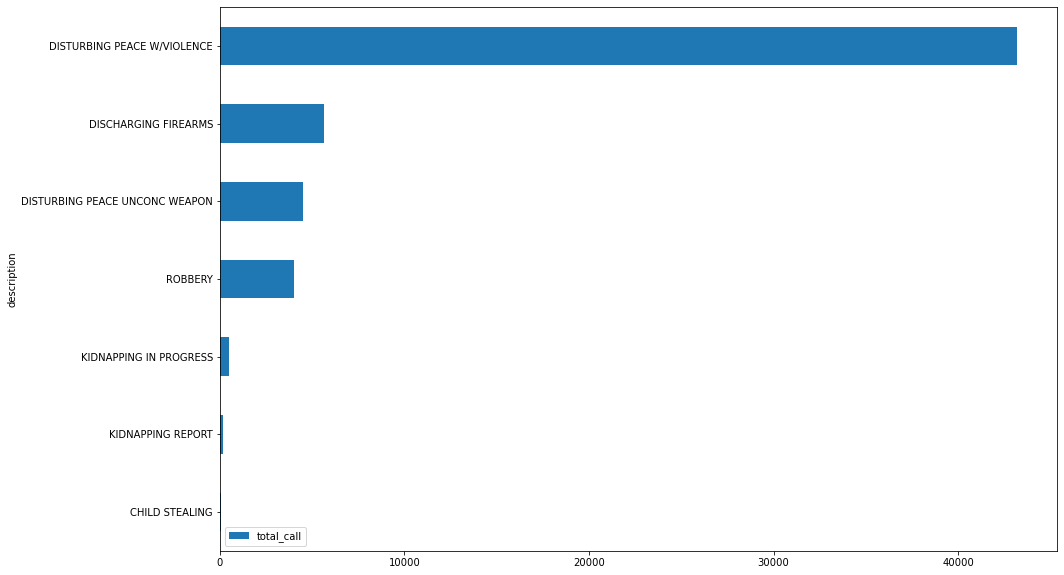

In [29]:
type_time_called.sort_values(by='total_call', ascending=True).plot(kind='barh', figsize=(15,10))

In [30]:
neighbor_time_called = filtered_crimes.groupby('neighborhood').sum()
neighbor_time_called = neighbor_time_called.drop(labels=['day_of_week', 'beat', 'priority'], axis=1)

In [31]:
neighbor_time_called

,total_call
neighborhood,
Adams North,121
Allied Gardens,181
Alta Vista,51
Azalea/Hollywood Park,197
Balboa Park,258
...,...
Torrey Preserve,3
University City,584
University Heights,489


In [32]:
filtered_crimes['name'] = filtered_crimes['neighborhood']

<ipython-input-32-f3b457fce026>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_crimes['name'] = filtered_crimes['neighborhood']


In [33]:
parks_info.head()

,name,address,phone,id,url,rating,review_count,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",1.619239e+10,9M_FW_-Ipx93I36w-_ykBg,https://www.yelp.com/biz/balboa-park-san-diego...,5.0,2105,-117.153150,32.734502,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",NaN,3AEHjqNrTmggA6G9VdhQfg,https://www.yelp.com/biz/civita-park-san-diego...,4.5,46,-117.147278,32.778315,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",1.619233e+10,3unbJeYrn1RmInZGmjp80g,https://www.yelp.com/biz/waterfront-park-san-d...,4.5,242,-117.172479,32.721952,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",NaN,PvHxIYrmaiFKdWUDTMDzcg,https://www.yelp.com/biz/trolley-barn-park-san...,4.5,102,-117.143789,32.762463,False
4,Bay View Park,"413 1st St Coronado, CA 92118",NaN,6IF4VB9-fkv_F-LBvG8ppQ,https://www.yelp.com/biz/bay-view-park-coronad...,5.0,42,-117.178967,32.701785,False


In [34]:
parks_info = parks_info.drop(labels=['phone', 'rating', 'review_count', 'id'], axis=1)

In [35]:
parks_info.head()

,name,address,url,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",https://www.yelp.com/biz/balboa-park-san-diego...,-117.153150,32.734502,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",https://www.yelp.com/biz/civita-park-san-diego...,-117.147278,32.778315,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",https://www.yelp.com/biz/waterfront-park-san-d...,-117.172479,32.721952,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",https://www.yelp.com/biz/trolley-barn-park-san...,-117.143789,32.762463,False
4,Bay View Park,"413 1st St Coronado, CA 92118",https://www.yelp.com/biz/bay-view-park-coronad...,-117.178967,32.701785,False


In [36]:
parks_info = parks_info.drop_duplicates('name')
parks_crime_merge = parks_info.merge(filtered_crimes, how='left').dropna().groupby('name').sum()
parks_crime_merge = parks_crime_merge.drop(labels=['longitude', 'latitude', 
                                                   'is_closed', 'day_of_week', 
                                                   'beat', 'priority'], axis=1)

In [37]:
parks_crime_merge

,total_call
name,
Balboa Park,258.0
Bay Park,390.0
Grantville,581.0
Kensington,129.0
La Jolla,681.0
Lake Murray,330.0
Little Italy,548.0
Mission Bay Park,303.0
Mission Beach,599.0


The reason I merged filtered_crime into parks_info and not the other way around is because I'm interested in analyzing the crime calls that are close to or within the area of the parks. The filtered_crime includes the names of neighborhoods, and thus there might be some calls that are in the neighborhood but far from the park. 

Now, I will gather the open-close hours for each of the above parks using google and yelp. If they are unclaimed, I will mark them as "unknown". I will not be creating a function that scrapes the business hour of these parks for the following reasons:
- There are only 15 parks remained after the merging of datasets, so searching up each park's business hour would not take long.
- I want to collect the business hour of these parks as of now (I want the static hours). If I create a web scraping function, these information might change in the future when this notebook is ran again.

When looking up the operation hours of each park, some of them were named as their neighborhood's name. For example, Pacific Beach is the name of the area near Pacific Beach. I had to choose the park/recreation center that is closest to the center of that area (ie. Pacific Beach Community Park). If none are present and nothing can be found about their hours, it will be labeled as 'unknown'

In [38]:
# Business hour of each park:
#     1. Balboa Park: 0-24 (Yelp)
#     2. Bay Park: Unclaimed
#     3. Grantville: Unclaimed
#     4. Kensington: Unclaimed
#     5. La Jolla: Unclaimed
#     6. Lake Murray: 7-20 (Google - Lake Murray Community Park)
#     7. Little Italy: Unclaimed
#     8. Mission Bay Park: 4-24 (Yelp)
#     9. Mission Beach: 6-22 (Google - Mission Beach Park)
#     10. Normal Heights: 10-19 (Google - Adams Recreation Center Area. Open/Close hours averaged out)
#     11. North Park: 0-24 (Google - North Park Community Park)
#     12. Ocean Beach: 10-20 (Google - Ocean Beach Recreation Center. Hours averaged out)
#     13. Pacific Beach: 10-18 (Google - Pacific Community Park. Hours averaged out)
#     14. Petco Park: 9-21 (Yelp)
#     15. San Ysidro: Unclaimed
parks_crime_merge['open'] = ['07', '-1', '-1', '-1', '-1', '07',
                             '-1', '4', '6', '10', '0', '10', '10',
                            '9', '-1']
parks_crime_merge['close'] = ['24', '-1', '-1', '-1', '-1', '20',
                             '-1', '24', '22', '19', '24', '20', '18',
                            '21', '-1']

In [39]:
parks_crime_merge

,total_call,open,close
name,,,
Balboa Park,258.0,07,24
Bay Park,390.0,-1,-1
Grantville,581.0,-1,-1
Kensington,129.0,-1,-1
La Jolla,681.0,-1,-1
Lake Murray,330.0,07,20
Little Italy,548.0,-1,-1
Mission Bay Park,303.0,4,24
Mission Beach,599.0,6,22


In [40]:
filtered_crimes[filtered_crimes['name'] == 'Linda Vista']

,incident_num,date_time,day_of_week,call_type,disposition,beat,priority,description,neighborhood,total_call,name
411,E18010000459,2018-01-01 04:04:48,0,11-6,K,621,1,DISCHARGING FIREARMS,Linda Vista,1,Linda Vista
1480,E18010001649,2018-01-02 01:50:13,1,415V,O,621,1,DISTURBING PEACE W/VIOLENCE,Linda Vista,1,Linda Vista
2921,E18010003187,2018-01-03 01:25:41,2,211,A,621,1,ROBBERY,Linda Vista,1,Linda Vista
5824,E18010006314,2018-01-05 00:06:12,4,415V,K,621,1,DISTURBING PEACE W/VIOLENCE,Linda Vista,1,Linda Vista
7801,E18010008425,2018-01-06 10:06:40,5,415V,K,621,1,DISTURBING PEACE W/VIOLENCE,Linda Vista,1,Linda Vista
...,...,...,...,...,...,...,...,...,...,...,...
1647776,E20110043161,2020-11-27 20:58:55,6,415V,K,621,1,DISTURBING PEACE W/VIOLENCE,Linda Vista,1,Linda Vista
1648864,E20110044340,2020-11-28 16:51:22,7,415V,K,621,1,DISTURBING PEACE W/VIOLENCE,Linda Vista,1,Linda Vista
1649652,E20110045195,2020-11-29 09:37:02,1,415V,O,621,1,DISTURBING PEACE W/VIOLENCE,Linda Vista,1,Linda Vista
1650237,E20110045831,2020-11-29 18:55:51,1,415V,K,621,1,DISTURBING PEACE W/VIOLENCE,Linda Vista,1,Linda Vista


In [41]:
filtered_crimes['date_time'] = pd.to_datetime(filtered_crimes['date_time'])

<ipython-input-41-ac5b7ce82f44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_crimes['date_time'] = pd.to_datetime(filtered_crimes['date_time'])


In [42]:
filtered_crimes['date_time'].dt.strftime('%H')

16         00
27         00
31         00
38         00
57         00
           ..
1653276    20
1653287    20
1653298    20
1653311    21
1653321    21
Name: date_time, Length: 58133, dtype: object

In [43]:
def categorize_time():
    name_list = parks_crime_merge.index.tolist()
    
    for i in range(0, len(name_list)):
        call_time = filtered_crimes[filtered_crimes['name'] == name_list[i]]['date_time'].dt.strftime('%H').tolist()
        start_time = int(parks_crime_merge.iloc[i]['open'])
        close_time = int(parks_crime_merge.iloc[i]['close'])
        
        for e in range(0, len(call_time)):
            call_time[e] = int(call_time[e])
            
            # If start_time is unknown or -1, then set during and not_during to -1
            # Else,
            #     if call_time >= start_time AND call_time <= close_time, then add 1 to during
            #     else if call_time < start_time OR call_time > close_time, then add 1 to not_during
            if start_time < 0:
                parks_crime_merge['during'][i] = -1
                parks_crime_merge['not_during'][i] = -1
            else:          
                if (call_time[e] >= start_time) & (call_time[e] <= close_time):
                    parks_crime_merge['during'][i] = parks_crime_merge['during'][i] + 1
                elif (call_time[e] < start_time) | (call_time[e] > close_time):
                    parks_crime_merge['not_during'][i] = parks_crime_merge['not_during'][i] + 1
            
    

In [44]:
parks_crime_merge['during'] = 0
parks_crime_merge['not_during'] = 0

In [45]:
parks_crime_merge

,total_call,open,close,during,not_during
name,,,,,
Balboa Park,258.0,07,24,0,0
Bay Park,390.0,-1,-1,0,0
Grantville,581.0,-1,-1,0,0
Kensington,129.0,-1,-1,0,0
La Jolla,681.0,-1,-1,0,0
Lake Murray,330.0,07,20,0,0
Little Italy,548.0,-1,-1,0,0
Mission Bay Park,303.0,4,24,0,0
Mission Beach,599.0,6,22,0,0


In [46]:
categorize_time()

<ipython-input-43-7e202f9a200b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parks_crime_merge['during'][i] = parks_crime_merge['during'][i] + 1
<ipython-input-43-7e202f9a200b>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parks_crime_merge['not_during'][i] = parks_crime_merge['not_during'][i] + 1
<ipython-input-43-7e202f9a200b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parks_crime_merge['during'][i] = -1
<ipython-inpu

In [47]:
parks_crime_merge

,total_call,open,close,during,not_during
name,,,,,
Balboa Park,258.0,07,24,224,34
Bay Park,390.0,-1,-1,-1,-1
Grantville,581.0,-1,-1,-1,-1
Kensington,129.0,-1,-1,-1,-1
La Jolla,681.0,-1,-1,-1,-1
Lake Murray,330.0,07,20,203,127
Little Italy,548.0,-1,-1,-1,-1
Mission Bay Park,303.0,4,24,270,33
Mission Beach,599.0,6,22,420,179


In [48]:
int(filtered_crimes[filtered_crimes['name'] == 'Balboa Park']['date_time'].dt.strftime('%H').tolist()[2])

9

In [49]:
filtered_crimes[filtered_crimes['name'] == 'Balboa Park']['date_time'].dt.strftime('%H').tolist()

['21',
 '14',
 '09',
 '06',
 '09',
 '23',
 '17',
 '02',
 '16',
 '17',
 '22',
 '10',
 '01',
 '16',
 '22',
 '13',
 '19',
 '11',
 '17',
 '12',
 '23',
 '01',
 '14',
 '22',
 '12',
 '18',
 '00',
 '02',
 '18',
 '04',
 '23',
 '16',
 '03',
 '13',
 '03',
 '19',
 '09',
 '05',
 '10',
 '10',
 '17',
 '12',
 '15',
 '01',
 '16',
 '11',
 '20',
 '03',
 '21',
 '20',
 '12',
 '15',
 '11',
 '09',
 '13',
 '15',
 '18',
 '19',
 '21',
 '12',
 '12',
 '11',
 '07',
 '06',
 '18',
 '10',
 '13',
 '21',
 '18',
 '14',
 '14',
 '17',
 '22',
 '22',
 '23',
 '08',
 '08',
 '21',
 '17',
 '09',
 '10',
 '17',
 '07',
 '17',
 '13',
 '11',
 '16',
 '01',
 '20',
 '15',
 '06',
 '20',
 '10',
 '00',
 '15',
 '09',
 '14',
 '21',
 '12',
 '08',
 '15',
 '14',
 '16',
 '14',
 '12',
 '20',
 '15',
 '21',
 '17',
 '17',
 '20',
 '12',
 '09',
 '12',
 '04',
 '02',
 '09',
 '10',
 '14',
 '19',
 '09',
 '09',
 '17',
 '08',
 '16',
 '11',
 '21',
 '20',
 '06',
 '14',
 '13',
 '13',
 '00',
 '09',
 '12',
 '13',
 '09',
 '00',
 '14',
 '23',
 '19',
 '12',
 '13',

In [50]:
parks_crime_merge.index.tolist()

['Balboa Park',
 'Bay Park',
 'Grantville',
 'Kensington',
 'La Jolla',
 'Lake Murray',
 'Little Italy',
 'Mission Bay Park',
 'Mission Beach',
 'Normal Heights',
 'North Park',
 'Ocean Beach',
 'Pacific Beach',
 'Petco Park',
 'San Ysidro']

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [51]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*